## 1차 과제 - 고객 유지/이탈 자유 분석
- 주제: 가입 고객 이탈 데이터를 분석하여 기업에 인사이트 제공
- 데이터: Customer Churn Data(train data가 따로 있으나 너무 커서 test data만 사용, 예측 성능 향상을 원한다면 train data 사용해도 무방)
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv
- 사용 라이브러리: 자유

본 과제는 여러분들의 실력을 확인하고자 출제한 과제로 어떠한 가이드라인도 제공하거나 제약하지 않으며 자유롭게 분석하시면 됩니다.

분석이나 예측 어느 쪽이든 상관없으며 몇가지 조건만 유의하여 주시기 바랍니다.

### 조건
1. 기본적인 분석 과정은 EDA(데이터 탐색) > 전처리 > 분석(예측) 진행 > 결과 해석 으로 진행되지만 약간의 수정 허용
2. EDA 과정에서 최소 2개의 시각화 모형(그래프) 사용
3. 분석 및 예측 시 최소 2개의 모형(모델) 사용
4. 전처리는 자유롭게 진행하며 추가적인 데이터 사용이 필요하다면 허용

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('./customer_churn_dataset-testing-master.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [5]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


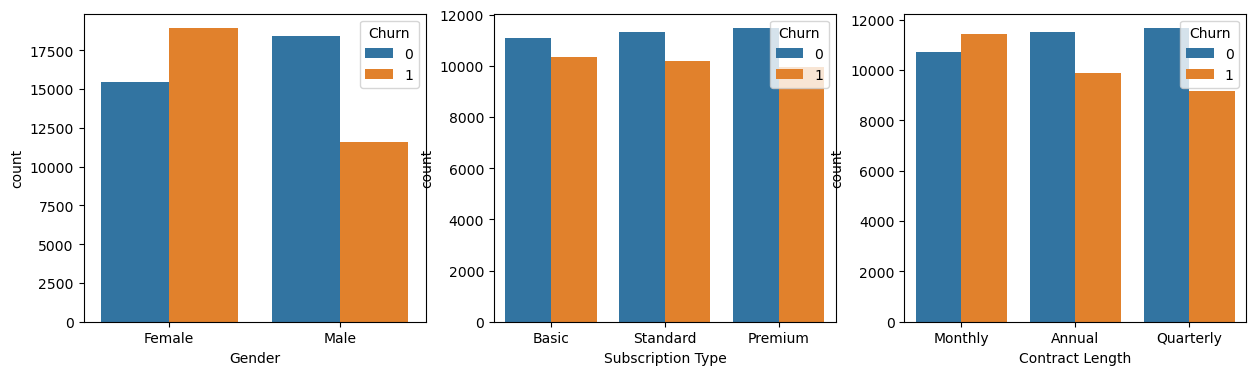

In [6]:
fig, axs = plt.subplots(figsize=(15, 4), ncols=3, nrows=1)
features = ['Gender', 'Subscription Type', 'Contract Length']
for i, feature in enumerate(features):
    sns.countplot(data=df, x=feature, hue='Churn',ax=axs[i])

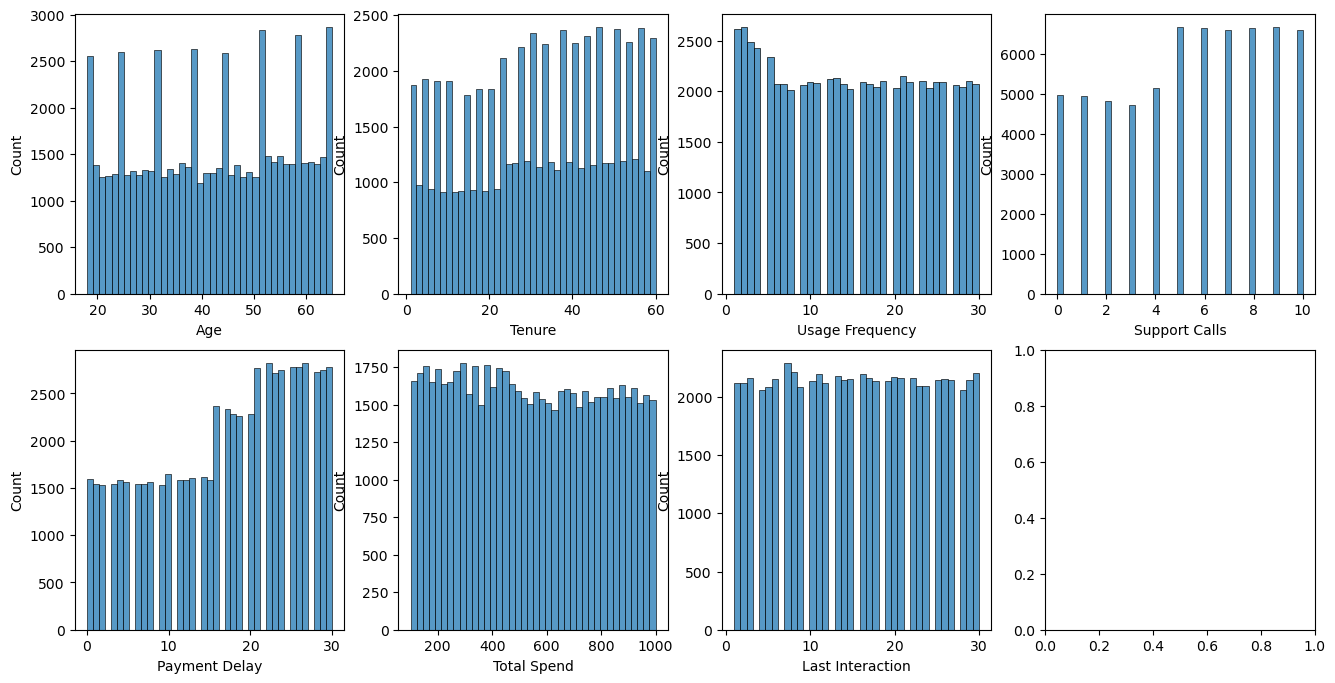

In [7]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay','Total Spend', 'Last Interaction']
for i, feature in enumerate(features):
    row = int(i/4)
    col = i%4
    sns.histplot(data=df, x=feature, ax=axs[row][col])

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df=pd.read_csv('./customer_churn_dataset-testing-master.csv')
def mapping(df):
    sub_mapping = {'Basic':0,'Standard':1,'Premium':2}
    df['Subscription Type'] = df['Subscription Type'].map(sub_mapping)
    len_mapping = {'Monthly':0,'Quarterly':1,'Annual':2}
    df['Contract Length'] = df['Contract Length'].map(len_mapping)
    gender=['Male','Female']
    df = pd.get_dummies(df, columns=['Gender'])
    return df
def drop(df):
    df.drop(['CustomerID'], axis=1, inplace=True)
    return df
def transform(df):
    df=drop(df)
    df=mapping(df)
    return df
df_1=transform(df)
df_1.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male
0,22,25,14,4,27,0,0,598,9,1,True,False
1,41,28,28,7,13,1,0,584,20,0,True,False
2,47,27,10,2,29,2,2,757,21,0,False,True
3,35,9,12,5,17,2,1,232,18,0,False,True
4,53,58,24,9,2,1,2,533,18,0,True,False


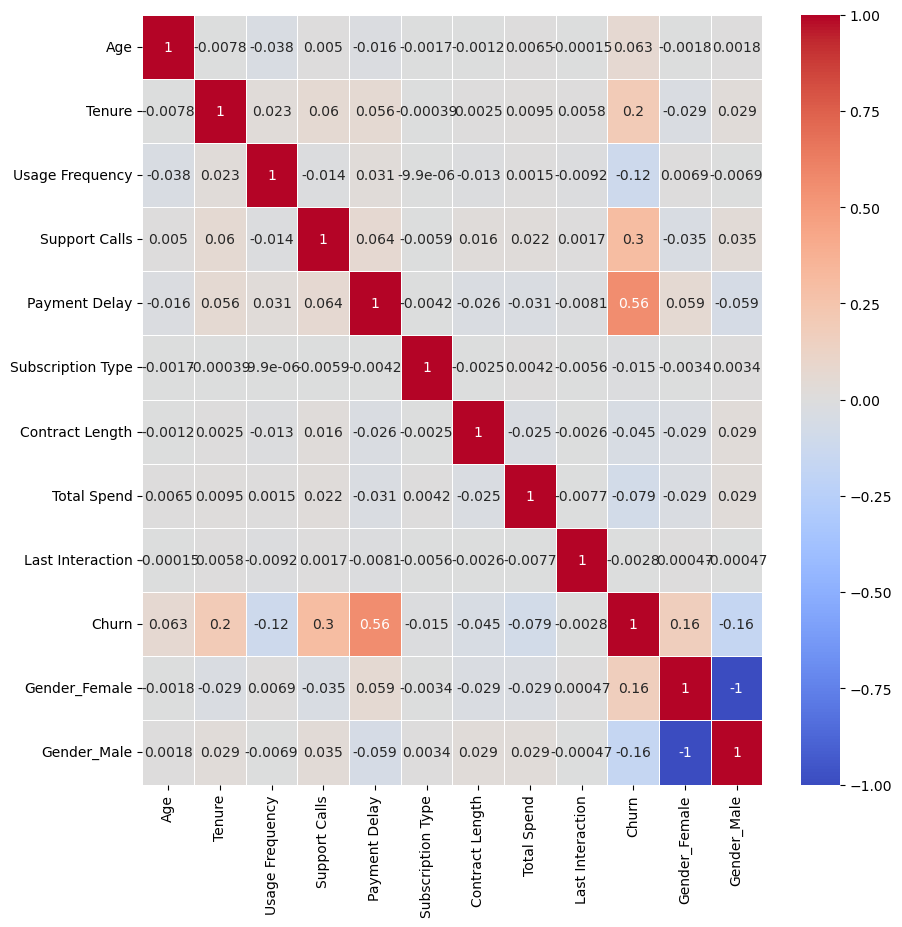

In [9]:
corr= df_1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.7, mask=corr.isnull())
plt.show()

In [10]:
y_df = df_1['Churn']
x_df = df_1.drop('Churn', axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=11)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('RandomForestClassifier ROC AUC: {0:.4f}'.format(roc_auc_score(y_test, rf_pred)))
print('RandomForestClassifier F1-Score: {0:.4f}'.format(f1_score(y_test, rf_pred)))
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('LogisticRegression ROC AUC: {0:.4f}'.format(roc_auc_score(y_test, lr_pred)))
print('LogisticRegression F1-Score: {0:.4f}'.format(f1_score(y_test, lr_pred)))

RandomForestClassifier 정확도: 0.9990
RandomForestClassifier ROC AUC: 0.9990
RandomForestClassifier F1-Score: 0.9989
LogisticRegression 정확도: 0.8237
LogisticRegression ROC AUC: 0.8238
LogisticRegression F1-Score: 0.8152


In [12]:
from sklearn.model_selection import GridSearchCV
lr_params = {'C':[0.1, 0.125, 0.2], 'max_iter':[800, 900, 1000], 'solver':['lbfgs','liblinear'], 'random_state':[42]}
grid=GridSearchCV(estimator=lr_clf, param_grid=lr_params, scoring='roc_auc', cv=5)
grid.fit(x_train, y_train)
print('최적 하이퍼파라미터: {}, LogisticRegression 최적 평균 정확도: {:.3f}'.format(grid.best_params_, grid.best_score_))

최적 하이퍼파라미터: {'C': 0.2, 'max_iter': 800, 'random_state': 42, 'solver': 'lbfgs'}, LogisticRegression 최적 평균 정확도: 0.904
